In [ ]:
!wget http://!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

--2022-02-11 04:24:27--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2022-02-11 04:24:27--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2022-02-11 04:24:27--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz.2’

images.tar.gz.2     100%[===================>] 755.23M  31.9MB/s    in 26s     

2022-02-11 04:24:54 (28.9 MB/s) - ‘images.tar.gz.2’ saved [791918971/791918971]

FINISHED -

In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2022-02-11 04:24:54--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz [following]
--2022-02-11 04:24:54--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/x-gzip]
Saving to: ‘annotations.tar.gz.2’

annotations.tar.gz. 100%[===================>]  18.28M  15.0MB/s    in 1.2s    

2022-02-11 04:24:56 (15.0 MB/s) - ‘annotations.tar.gz.2’ saved [19173078/19173078]



In [1]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [2]:
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

In [3]:
import os

input_dir = 'images/'
target_dir = 'annotations/trimaps'

input_img_paths = sorted(
    [os.path.join(input_dir, fname) for fname in os.listdir(input_dir) if fname.endswith('.jpg')]
)

target_paths = sorted(
    [os.path.join(target_dir, fname) 
    for fname in os.listdir(target_dir)
    if fname.endswith('.png') and not fname.startswith('.')]
)

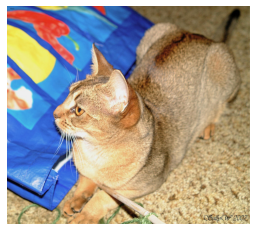

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.axis('off')
plt.imshow(load_img(input_img_paths[9]))

In [5]:
def display_target(target_array):
  normalized_array = (target_array.astype('uint8') - 1) * 127
  plt.axis('off')
  plt.imshow(normalized_array[:,:,0])

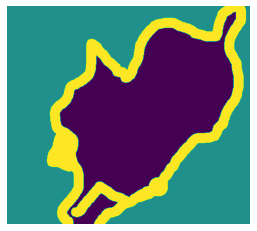

In [6]:
img = img_to_array(load_img(target_paths[9], color_mode='grayscale'))
display_target(img)

In [7]:
import numpy as np
import random, sys

img_size = (200,200)
num_imgs = len(input_img_paths)

random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

def path_to_imput_image(path):
  return img_to_array(load_img(path, target_size=img_size))

def path_to_target(path):
  img = img_to_array(
      load_img(path, target_size=img_size, color_mode='grayscale')
  )
  img = img.astype('uint8') - 1
  return img

input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype='float32')
targets = np.zeros((num_imgs,) + img_size + (1,), dtype='uint8')

for i in range(num_imgs):
  print(i,'/', num_imgs)
  input_imgs[i] = path_to_imput_image(input_img_paths[i])
  targets[i] = path_to_target(target_paths[i])

num_val_samples = 1000
train_input_imgs = input_imgs[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_input_imgs = input_imgs[-num_val_samples:]
val_targets = targets[-num_val_samples:]

Streaming output truncated to the last 5000 lines.
2390 / 7390
2391 / 7390
2392 / 7390
2393 / 7390
2394 / 7390
2395 / 7390
2396 / 7390
2397 / 7390
2398 / 7390
2399 / 7390
2400 / 7390
2401 / 7390
2402 / 7390
2403 / 7390
2404 / 7390
2405 / 7390
2406 / 7390
2407 / 7390
2408 / 7390
2409 / 7390
2410 / 7390
2411 / 7390
2412 / 7390
2413 / 7390
2414 / 7390
2415 / 7390
2416 / 7390
2417 / 7390
2418 / 7390
2419 / 7390
2420 / 7390
2421 / 7390
2422 / 7390
2423 / 7390
2424 / 7390
2425 / 7390
2426 / 7390
2427 / 7390
2428 / 7390
2429 / 7390
2430 / 7390
2431 / 7390
2432 / 7390
2433 / 7390
2434 / 7390
2435 / 7390
2436 / 7390
2437 / 7390
2438 / 7390
2439 / 7390
2440 / 7390
2441 / 7390
2442 / 7390
2443 / 7390
2444 / 7390
2445 / 7390
2446 / 7390
2447 / 7390
2448 / 7390
2449 / 7390
2450 / 7390
2451 / 7390
2452 / 7390
2453 / 7390
2454 / 7390
2455 / 7390
2456 / 7390
2457 / 7390
2458 / 7390
2459 / 7390
2460 / 7390
2461 / 7390
2462 / 7390
2463 / 7390
2464 / 7390
2465 / 7390
2466 / 7390
2467 / 7390
2468 / 7390
2

In [8]:
!nvidia-smi

Fri Feb 11 06:35:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(img_size, num_classes):
  inputs = keras.Input(shape=img_size + (3,))
  x = layers.Rescaling(1./255)(inputs)

  x = layers.Conv2D(64, 3, strides=2, activation='relu', padding='same')(x)
  x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
  x = layers.Conv2D(128, 3, strides=2, activation='relu', padding='same')(x)
  x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
  x = layers.Conv2D(256, 3, strides=2, activation='relu', padding='same')(x)
  x = layers.Conv2D(256, 3, activation='relu', padding='same')(x)

  x = layers.Conv2DTranspose(256, 3, activation='relu', padding='same')(x)
  x = layers.Conv2DTranspose(256, 3, strides=2, activation='relu', padding='same')(x)
  x = layers.Conv2DTranspose(128, 3, activation='relu', padding='same')(x)
  x = layers.Conv2DTranspose(128, 3 , strides=2, activation='relu', padding='same')(x)
  x = layers.Conv2DTranspose(64, 3, activation='relu', padding='same')(x)
  x = layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same')(x)

  outputs = layers.Conv2D(num_classes, 3, activation='softmax', padding='same')(x)

  model = keras.Model(inputs, outputs)
  return model

model = get_model(img_size=img_size, num_classes=3)
model.summary()

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

callbacks = [
             keras.callbacks.ModelCheckpoint('oxford_segmentation.keras',
                                             save_best_only=True)
]

history = model.fit(train_input_imgs, train_targets,
                    epochs=50, callbacks=callbacks, batch_size=64,
                    validation_data=(val_input_imgs, val_targets))

Epoch 1/50
100/100 [==============================] - 87s 676ms/step - loss: 1.0886 - val_loss: 0.9235
Epoch 2/50
100/100 [==============================] - 59s 588ms/step - loss: 0.9108 - val_loss: 0.8022
Epoch 3/50
100/100 [==============================] - 60s 601ms/step - loss: 0.8071 - val_loss: 0.7698
Epoch 4/50
100/100 [==============================] - 60s 599ms/step - loss: 0.7839 - val_loss: 0.8012
Epoch 5/50
100/100 [==============================] - 60s 602ms/step - loss: 0.7458 - val_loss: 0.6870
Epoch 6/50
100/100 [==============================] - 60s 605ms/step - loss: 0.6879 - val_loss: 0.6211
Epoch 7/50
100/100 [==============================] - 61s 607ms/step - loss: 0.6477 - val_loss: 0.6186
Epoch 8/50
100/100 [==============================] - 60s 605ms/step - loss: 0.6044 - val_loss: 0.5809
Epoch 9/50
100/100 [==============================] - 60s 600ms/step - loss: 0.5868 - val_loss: 0.6138
Epoch 10/50
100/100 [==============================] - 61s 606ms/step - l

model crashed after 20 epochs

try to load the model from ModelCheckpoint and keep training

In [9]:
from tensorflow import keras

loaded_model = keras.models.load_model('oxford_segmentation.keras')

loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 256)       295168

In [10]:
callbacks = [
             keras.callbacks.ModelCheckpoint('oxford_segmentation_2.keras',
                                             save_best_only=True)
]

history_2 = loaded_model.fit(train_input_imgs, train_targets,
                    epochs=20, callbacks=callbacks, batch_size=64,
                    validation_data=(val_input_imgs, val_targets))

Epoch 1/20
100/100 [==============================] - 165s 1s/step - loss: 0.4106 - val_loss: 0.3871
Epoch 2/20
100/100 [==============================] - 131s 1s/step - loss: 0.3933 - val_loss: 0.3775
Epoch 3/20
100/100 [==============================] - 130s 1s/step - loss: 0.3896 - val_loss: 0.3893
Epoch 4/20
100/100 [==============================] - 130s 1s/step - loss: 0.3737 - val_loss: 0.4400
Epoch 5/20
100/100 [==============================] - 130s 1s/step - loss: 0.3751 - val_loss: 0.4289
Epoch 6/20
100/100 [==============================] - 130s 1s/step - loss: 0.3614 - val_loss: 0.3922
Epoch 7/20
100/100 [==============================] - 130s 1s/step - loss: 0.3528 - val_loss: 0.3591
Epoch 8/20
100/100 [==============================] - 130s 1s/step - loss: 0.3469 - val_loss: 0.3844
Epoch 9/20
100/100 [==============================] - 130s 1s/step - loss: 0.3325 - val_loss: 0.4225
Epoch 10/20
100/100 [==============================] - 130s 1s/step - loss: 0.3228 - val_lo

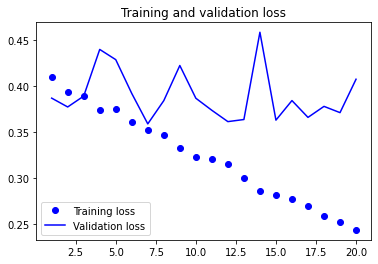

In [11]:
epochs = range(1, len(history_2.history['loss'])+1)
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Double check if this is the right one lol

In [12]:
model = keras.models.load_model('oxford_segmentation_2.keras')

model.evaluate(val_input_imgs,val_targets)

32/32 [==============================] - 12s 279ms/step - loss: 0.3591


0.359083890914917

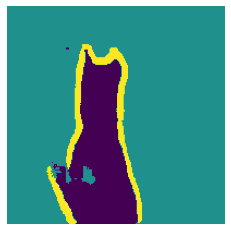

In [13]:
from tensorflow.keras.utils import array_to_img

model = keras.models.load_model('oxford_segmentation_2.keras')

i = 4
test_image = val_input_imgs[i]
plt.axis('off')
plt.imshow(array_to_img(test_image))

mask = model.predict(np.expand_dims(test_image, 0))[0]

def display_mask(pred):
  mask = np.argmax(pred, axis=-1)
  mask *= 127
  plt.axis('off')
  plt.imshow(mask)

display_mask(mask)

Finally!!!